## 1. Introduction
Temperature prediction is a critical component of weather forecasting, which has significant applications in agriculture, disaster management, and climate science. This project aims to replicate and enhance the study titled "Temperature Prediction using Machine Learning Approaches" using the "High-Resolution Daily Gridded Temperature Data Set (1951-2016) for the Indian Region." The primary objectives are to develop and compare predictive models using Multiple Linear Regression (MLR), Artificial Neural Network (ANN), and Support Vector Machine (SVM), and to introduce new features and advanced modeling techniques to improve prediction accuracy.

#2. Import Libraries
Import the necessary libraries to handle data, visualize it, and build machine learning models.

In [1]:
# Install necessary libraries (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras

# Import libraries for data handling
import pandas as pd
import numpy as np

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import libraries for neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set visualization style
sns.set(style='whitegrid')


#Set Up Environment Configuration
Configure any specific settings for the environment, such as increasing the default plot size for better visualization.



In [2]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style='whitegrid')


##3. Data Loading
In this section, we will load the high-resolution daily gridded temperature dataset from GitHub into our environment. The dataset includes maximum, minimum, and mean temperatures across a 31x31 grid, covering various years.

Download and Extract Data Files
First, we need to download the ZIP files from GitHub and extract them.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:


# Define directories for the dataset
mint_dir = '/content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/'
maxt_dir = '/content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MaxT/'
meant_dir = '/content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MeanT/'

# Import necessary libraries for loading data
import os
import numpy as np
import pandas as pd

# Function to check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Function to read binary .GRD files
def read_grd_file(file_path, days_in_year):
    try:
        with open(file_path, 'rb') as file:
            data = np.fromfile(file, dtype=np.float32)
            data = data.reshape((days_in_year, 31, 31))
            return data
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return np.array([])

# Function to load data from a directory
def load_data_from_directory(directory):
    data_frames = []
    print(f"Loading data from directory: {directory}")
    for file in sorted(os.listdir(directory)):
        if file.endswith('.GRD'):
            year = int(file[-8:-4])
            days_in_year = 366 if is_leap_year(year) else 365
            file_path = os.path.join(directory, file)
            print(f"Reading file: {file_path}")
            data = read_grd_file(file_path, days_in_year)
            if data.size > 0:
                for day in range(days_in_year):
                    df = pd.DataFrame(data[day], columns=[f'Lon_{i}' for i in range(31)])
                    df['Day'] = day + 1
                    df['Year'] = year
                    data_frames.append(df)
    if data_frames:
        return pd.concat(data_frames, axis=0)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no data was loaded

# Load the temperature data
min_temp_data = load_data_from_directory(mint_dir)
max_temp_data = load_data_from_directory(maxt_dir)
mean_temp_data = load_data_from_directory(meant_dir)

# Check if data was loaded successfully
if not min_temp_data.empty:
    print("Min Temperature Data loaded successfully:")
    print(min_temp_data.head())
else:
    print("No Min Temperature Data found.")

if not max_temp_data.empty:
    print("Max Temperature Data loaded successfully:")
    print(max_temp_data.head())
else:
    print("No Max Temperature Data found.")

if not mean_temp_data.empty:
    print("Mean Temperature Data loaded successfully:")
    print(mean_temp_data.head())
else:
    print("No Mean Temperature Data found.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data from directory: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1951.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1952.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1953.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1954.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1955.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1956.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1957.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1958.GRD
Reading file: /content/drive/MyDrive/TEMP DATA 1BY1 (1951-2016)/MinT/MinT_1959.GRD
Reading file: /content/drive/MyDrive/TE

##4. Data Exploration and Visualization (EDA)
In this section, we will explore and visualize the loaded temperature data to understand its structure, identify patterns, and detect any anomalies. This will involve generating summary statistics, visualizing trends, and mapping spatial distributions.

Steps:
Summary Statistics:

Generate summary statistics for the minimum, maximum, and mean temperature data to understand the range, mean, median, and distribution of the temperature values.

In [ ]:
# Summary Statistics for Min Temperature Data
print("Summary Statistics for Min Temperature Data:")
print(min_temp_data.describe())

# Summary Statistics for Max Temperature Data
print("\nSummary Statistics for Max Temperature Data:")
print(max_temp_data.describe())

# Summary Statistics for Mean Temperature Data
print("\nSummary Statistics for Mean Temperature Data:")
print(mean_temp_data.describe())


Summary Statistics for Min Temperature Data:
               Lon_0          Lon_1          Lon_2          Lon_3  \
count  747317.000000  747317.000000  747317.000000  747317.000000   
mean       99.899971      94.835350      87.152855      76.741516   
std         0.000000      19.335604      29.154697      36.354191   
min        99.900002       6.170000       1.090000       0.360000   
25%        99.900002      99.900002      99.900002      26.120001   
50%        99.900002      99.900002      99.900002      99.900002   
75%        99.900002      99.900002      99.900002      99.900002   
max        99.900002      99.900002      99.900002      99.900002   

               Lon_4          Lon_5          Lon_6          Lon_7  \
count  747317.000000  747317.000000  747317.000000  747317.000000   
mean       76.626396      64.546326      47.206821      35.695877   
std        36.536480      40.196011      39.436951      34.682529   
min        -0.050000      -6.990000      -8.680000      -

#Time Series Plots:

Visualize temperature trends over the years using line plots. This can help identify long-term trends, seasonal patterns, and any anomalies.

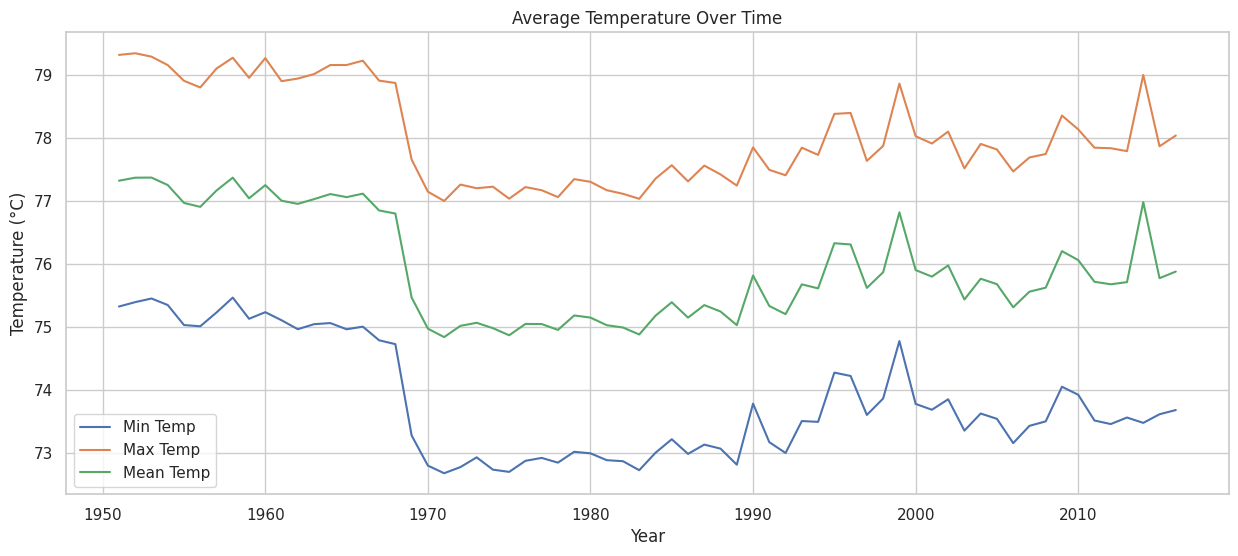

In [ ]:
# Time Series Plots for Min, Max, and Mean Temperature

# Grouping data by year and calculating the mean temperature for each year
min_temp_yearly = min_temp_data.groupby('Year').mean().mean(axis=1)
max_temp_yearly = max_temp_data.groupby('Year').mean().mean(axis=1)
mean_temp_yearly = mean_temp_data.groupby('Year').mean().mean(axis=1)

plt.figure(figsize=(15, 6))
plt.plot(min_temp_yearly, label='Min Temp')
plt.plot(max_temp_yearly, label='Max Temp')
plt.plot(mean_temp_yearly, label='Mean Temp')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.legend()
plt.show()


# Spatial Visualization
 heatmaps to visualize the spatial distribution of temperatures. This will help us understand how temperatures vary across different grid points.

In [ ]:
import seaborn as sns

# Function to plot heatmap for a specific day and year
def plot_heatmap(temp_data, temp_type, year, day):
    # Extract data for the specific day and year
    specific_day_data = temp_data[(temp_data['Year'] == year) & (temp_data['Day'] == day)]
    specific_day_data = specific_day_data.drop(['Day', 'Year', 'Month'], axis=1)

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(specific_day_data.T, cmap='coolwarm', annot=False, cbar=True)
    plt.title(f'Spatial Distribution of {temp_type} Temperatures on Day {day}, {year}')
    plt.xlabel('Longitude Index')
    plt.ylabel('Latitude Index')
    plt.show()

# Plot heatmap for Minimum Temperature on a specific day (e.g., January 1st, 1951)
plot_heatmap(min_temp_data, 'Min', 1951, 1)

# Plot heatmap for Maximum Temperature on a specific day (e.g., January 1st, 1951)
plot_heatmap(max_temp_data, 'Max', 1951, 1)

# Plot heatmap for Mean Temperature on a specific day (e.g., January 1st, 1951)
plot_heatmap(mean_temp_data, 'Mean', 1951, 1)


KeyError: "['Month'] not found in axis"

4.5 Identify Missing Values and Anomalies
In this section, we will check for missing values and potential anomalies in the dataset. Identifying missing values and anomalies is crucial for ensuring the quality and accuracy of our analysis and modeling.



In [ ]:
# Checking for missing values in the Min Temperature Data
print("Missing Values in Min Temperature Data:")
print(min_temp_data.isnull().sum())

# Checking for missing values in the Max Temperature Data
print("\nMissing Values in Max Temperature Data:")
print(max_temp_data.isnull().sum())

# Checking for missing values in the Mean Temperature Data
print("\nMissing Values in Mean Temperature Data:")
print(mean_temp_data.isnull().sum())


##5. Data Preprocessing
5.1 Handling Anomalies
First, we will replace the placeholder value of 99.900002 with NaN and then handle these NaN values.

In [ ]:
# Importing necessary library for handling missing values
import numpy as np

# Replace 99.900002 with NaN in the datasets
min_temp_data.replace(99.900002, np.nan, inplace=True)
max_temp_data.replace(99.900002, np.nan, inplace=True)
mean_temp_data.replace(99.900002, np.nan, inplace=True)

# Check for any remaining NaN values
print("Missing Values in Min Temperature Data after replacing anomalies:")
print(min_temp_data.isnull().sum())

print("\nMissing Values in Max Temperature Data after replacing anomalies:")
print(max_temp_data.isnull().sum())

print("\nMissing Values in Mean Temperature Data after replacing anomalies:")
print(mean_temp_data.isnull().sum())


5.2 Normalization or Standardization
In this step, we will normalize the temperature data to ensure all features have the same scale. Normalization will transform the data to a range of [0, 1], which is particularly important for models like neural networks and SVM.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the data (excluding 'Day', 'Year', 'Month' columns)
min_temp_data_scaled = min_temp_data.copy()
max_temp_data_scaled = max_temp_data.copy()
mean_temp_data_scaled = mean_temp_data.copy()

min_temp_data_scaled.iloc[:, :-3] = scaler.fit_transform(min_temp_data.iloc[:, :-3])
max_temp_data_scaled.iloc[:, :-3] = scaler.fit_transform(max_temp_data.iloc[:, :-3])
mean_temp_data_scaled.iloc[:, :-3] = scaler.fit_transform(mean_temp_data.iloc[:, :-3])

# Display the scaled data
print("Scaled Min Temperature Data:")
print(min_temp_data_scaled.head())

print("\nScaled Max Temperature Data:")
print(max_temp_data_scaled.head())

print("\nScaled Mean Temperature Data:")
print(mean_temp_data_scaled.head())


5.3 Feature Engineering
In this step, we will create additional features such as lagged features to capture temporal dependencies in the data. Lagged features are previous values of the same time series which can help in predicting future values.

In [ ]:
# Creating lagged features for temperature data
def create_lagged_features(data, lag=3):
    lagged_data = data.copy()
    for i in range(1, lag+1):
        lagged_data[f'Lag_{i}'] = data['Lon_0'].shift(i)
    return lagged_data

# Creating lagged features for Min, Max, and Mean temperature data
min_temp_data_lagged = create_lagged_features(min_temp_data_scaled, lag=3)
max_temp_data_lagged = create_lagged_features(max_temp_data_scaled, lag=3)
mean_temp_data_lagged = create_lagged_features(mean_temp_data_scaled, lag=3)

# Dropping rows with NaN values created due to lagging
min_temp_data_lagged.dropna(inplace=True)
max_temp_data_lagged.dropna(inplace=True)
mean_temp_data_lagged.dropna(inplace=True)

# Display the data with lagged features
print("Min Temperature Data with Lagged Features:")
print(min_temp_data_lagged.head())

print("\nMax Temperature Data with Lagged Features:")
print(max_temp_data_lagged.head())

print("\nMean Temperature Data with Lagged Features:")
print(mean_temp_data_lagged.head())
